In [2]:
!pip install pandas

In [3]:
import pandas as pd

import matplotlib.pyplot as plt



C:\Users\yasir\AppData\Local\Temp\ipykernel_24820\1490849411.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv('Dataset_1.csv')

In [5]:
data.head()

,amplitude1,phase1,amplicude2,phase2,amplitude3,phase3,amplitude4,phase4,amplitude5,phase5,...,phase60,amplitude61,phase61,amplitude62,phase62,amplitude63,phase63,amplitude64,phase64,activity
0,44.096855,0.320846,2.671706,3.155444e-30,618.694072,23.029147,576.060826,22.895069,410.659886,23.097584,...,26.169864,405.070562,22.954477,224.983037,22.486659,58.537064,21.824703,28.652871,21.907521,0
1,351.808421,1.574547,131.215400,3.155444e-30,1643.281453,57.225698,1399.395872,56.553442,931.552369,52.762625,...,47.479389,1288.636708,63.152997,534.562906,68.530525,94.749448,72.465455,46.217489,71.200815,0
2,405.361842,2.037881,777.512978,3.155444e-30,3040.506882,29.242175,2428.098348,27.042593,1481.743453,27.814805,...,44.485971,1320.790712,43.684654,357.560602,43.461716,25.122297,43.696236,205.616516,44.876158,0
3,53.322393,1.061615,220.587184,3.155444e-30,2305.298125,146.062200,2171.443946,139.087301,1488.249871,139.343858,...,122.006521,577.445065,141.219363,142.297185,149.722043,65.286518,156.344284,266.784351,157.938816,0
4,24.330650,0.701943,49.317554,3.155444e-30,2670.297117,42.493378,2596.917334,28.889549,1578.761543,25.116414,...,75.686033,1578.203732,79.367759,504.463139,77.982490,23.889191,76.377473,73.123601,78.062771,0


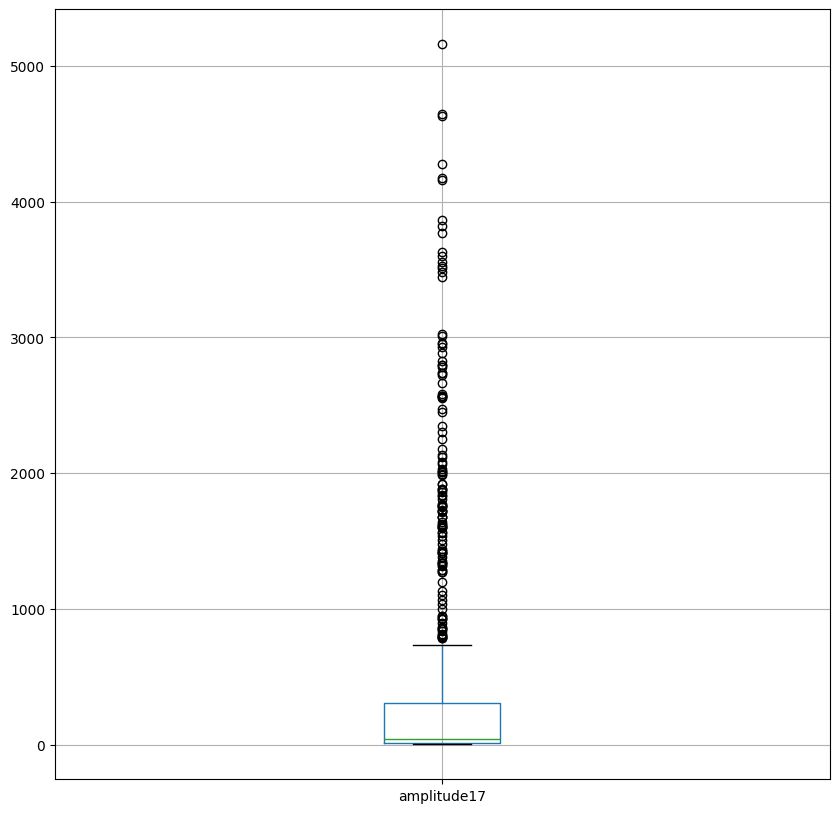

In [6]:
from matplotlib.pyplot import boxplot

figure = plt.figure(figsize=(10,10))
data.boxplot(column=['amplitude17'])

plt.show()


In [7]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [8]:
X.head()

,amplitude1,phase1,amplicude2,phase2,amplitude3,phase3,amplitude4,phase4,amplitude5,phase5,...,amplitude60,phase60,amplitude61,phase61,amplitude62,phase62,amplitude63,phase63,amplitude64,phase64
0,44.096855,0.320846,2.671706,3.155444e-30,618.694072,23.029147,576.060826,22.895069,410.659886,23.097584,...,537.740580,26.169864,405.070562,22.954477,224.983037,22.486659,58.537064,21.824703,28.652871,21.907521
1,351.808421,1.574547,131.215400,3.155444e-30,1643.281453,57.225698,1399.395872,56.553442,931.552369,52.762625,...,1903.538819,47.479389,1288.636708,63.152997,534.562906,68.530525,94.749448,72.465455,46.217489,71.200815
2,405.361842,2.037881,777.512978,3.155444e-30,3040.506882,29.242175,2428.098348,27.042593,1481.743453,27.814805,...,2015.564502,44.485971,1320.790712,43.684654,357.560602,43.461716,25.122297,43.696236,205.616516,44.876158
3,53.322393,1.061615,220.587184,3.155444e-30,2305.298125,146.062200,2171.443946,139.087301,1488.249871,139.343858,...,1015.746289,122.006521,577.445065,141.219363,142.297185,149.722043,65.286518,156.344284,266.784351,157.938816
4,24.330650,0.701943,49.317554,3.155444e-30,2670.297117,42.493378,2596.917334,28.889549,1578.761543,25.116414,...,2343.869432,75.686033,1578.203732,79.367759,504.463139,77.982490,23.889191,76.377473,73.123601,78.062771


In [9]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object
pca = PCA(n_components=20)

# Fit the PCA model to the data
pca.fit(X_std)

# Transform the data
X_pca = pca.transform(X_std)

In [11]:
print(X_pca.shape)

(884, 20)


In [69]:
import pandas as pd

# Assuming that `X` is a DataFrame and its columns are the feature names
feature_names = X.columns

# Create a DataFrame with the loadings
loadings = pd.DataFrame(pca.components_, columns=feature_names)

# Create titles for the principal components
pc_titles = ['PC' + str(i+1) for i in range(pca.n_components_)]

# Set the titles as the index of the DataFrame
loadings.index = pc_titles

print(loadings)

      amplitude1    phase1  amplicude2        phase2  amplitude3    phase3  \
PC1     0.039642  0.019576    0.009193  2.190729e-20    0.131301  0.004833   
PC2    -0.012371 -0.004054   -0.012811 -2.702833e-19   -0.009063  0.186393   
PC3    -0.001671  0.002572   -0.003454  2.219552e-19    0.001411  0.044194   
PC4     0.007124  0.012362    0.005303 -1.442093e-18    0.012926 -0.091684   
PC5    -0.014996 -0.005903   -0.017617 -1.954263e-17    0.096767 -0.077415   
PC6    -0.058376 -0.060272   -0.038807  3.024171e-18   -0.210167 -0.080386   
PC7     0.074443  0.045204    0.040150  1.029184e-17    0.082835 -0.022496   
PC8    -0.007599  0.044872    0.012637  1.962216e-17   -0.050830  0.092087   
PC9     0.150802  0.088659    0.164850  5.273828e-17    0.048187 -0.024300   
PC10    0.606816  0.390325    0.598278  4.137690e-17   -0.018752 -0.015770   
PC11   -0.109682 -0.061116   -0.133574  2.594255e-17    0.099274 -0.095785   
PC12   -0.037468  0.082712   -0.073965  2.680072e-17    0.088760

In [68]:
print(pca.components_.shape)

(20, 128)


In [70]:
print(X_pca)

[[-1.68366813 -5.95480171 -2.81806257 ... -0.06744942 -0.10436712
   0.60214678]
 [ 2.56936969 -2.87212128  3.40381336 ... -0.65407102 -0.25630022
  -0.82656943]
 [ 5.76651059 -3.29021709 -4.18246127 ... -0.42739528  0.47684748
   0.01391168]
 ...
 [ 0.50183466 -1.37431656  3.66939812 ... -0.7870059   0.32332
   0.08657593]
 [ 0.14323095 -2.65693614 -1.06108663 ...  0.28405369 -2.05483731
  -0.47662612]
 [ 6.99768147 -1.95844756  6.23681532 ... -2.42951953 -0.34947937
   0.69318135]]


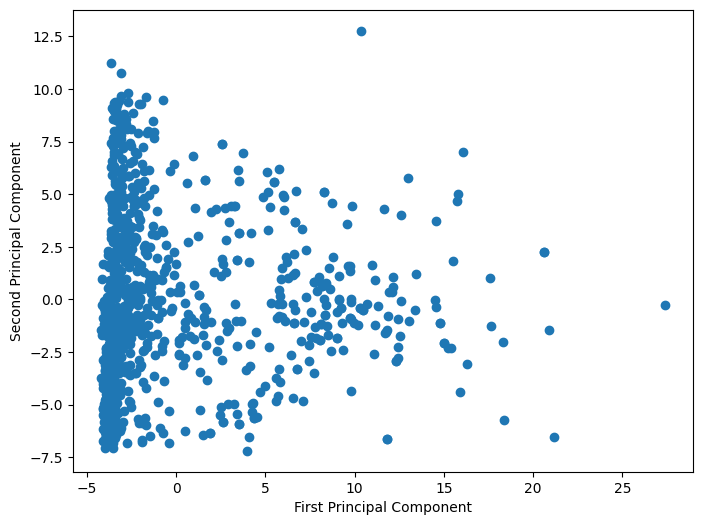

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

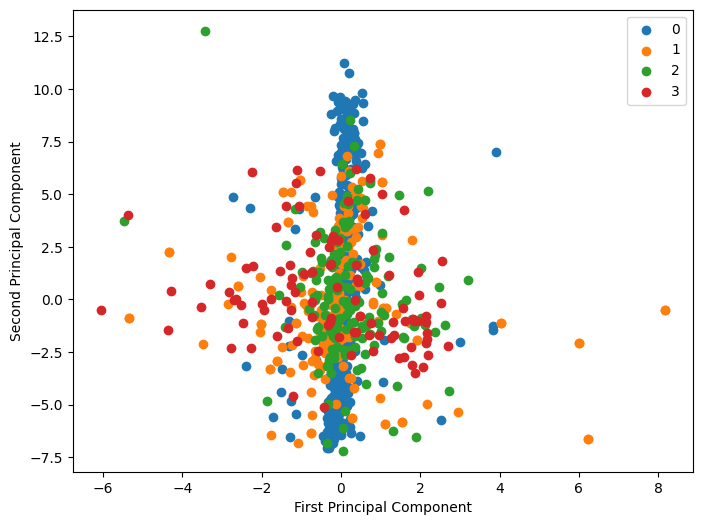

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for target in np.unique(Y):
    mask = Y == target
    plt.scatter(X_pca[mask, 12], X_pca[mask, 1], label=target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [80]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=4)

# Fit the GMM to your data
gmm.fit(X_pca)

# Predict the activity column of your dataset
y_pred = gmm.predict(X_pca)

In [96]:
zero = [0,0,0,0]
one = [0,0,0,0]
two = [0,0,0,0]
three = [0,0,0,0]

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        if Y[i] == 0:
            zero[0] += 1
        elif Y[i] == 1:
            zero[1] += 1
        elif Y[i] == 2:
            zero[2] += 1
        elif Y[i] == 3:
            zero[3] += 1
    elif y_pred[i] == 1:
        if Y[i] == 0:
            one[0] += 1
        elif Y[i] == 1:
            one[1] += 1
        elif Y[i] == 2:
            one[2] += 1
        elif Y[i] == 3:
            one[3] += 1
    elif y_pred[i] == 2:
        if Y[i] == 0:
            two[0] += 1
        elif Y[i] == 1:
            two[1] += 1
        elif Y[i] == 2:
            two[2] += 1
        elif Y[i] == 3:
            two[3] += 1
    elif y_pred[i] == 3:
        if Y[i] == 0:
            three[0] += 1
        elif Y[i] == 1:
            three[1] += 1
        elif Y[i] == 2:
            three[2] += 1
        elif Y[i] == 3:
            three[3] += 1
    

In [97]:
total = sum(zero)
print("Zero : " + str(total))
zero = [(x / total) * 100 for x in zero]

total = sum(one)
print("One : " + str(total))
one = [(x / total) * 100 for x in one]

total = sum(two)
print("Two : " + str(total))
two = [(x / total) * 100 for x in two]

total = sum(three)
print("Three : " + str(total))
three = [(x / total) * 100 for x in three]



Zero : 214
One : 254
Two : 52
Three : 364


In [90]:
print(zero)

[5.14018691588785, 50.467289719626166, 37.850467289719624, 6.5420560747663545]


In [91]:
print(one)

[12.992125984251967, 37.00787401574803, 25.590551181102363, 24.409448818897637]


In [92]:
print(two)

[0.0, 17.307692307692307, 34.61538461538461, 48.07692307692308]


In [93]:
print(three)

[99.72527472527473, 0.0, 0.27472527472527475, 0.0]
